## kelvin波的空间分布以及经向平均结构

In [6]:
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as ctk
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as ticker

0
IO
1
WP-CP
2
EP-ATL
3
AFR


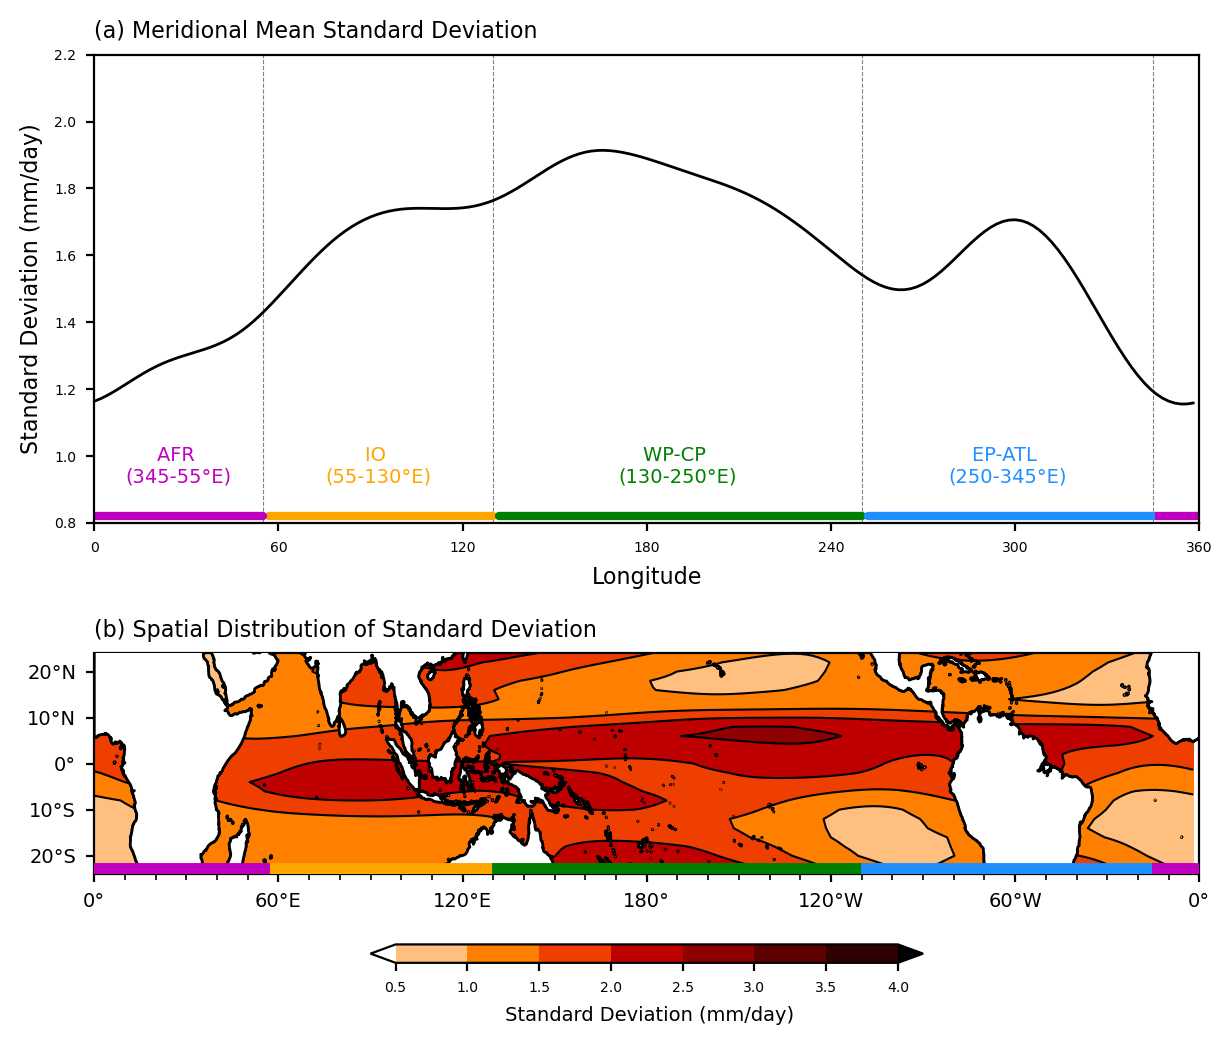

In [52]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar  6 16:07:27 2025

@author: xpji
"""

# 参数配置 ===============================================================
plt.rcParams.update({
    'font.size': 6,
    'axes.titlesize': 8,
    'axes.labelsize': 8,
    'xtick.labelsize': 5,
    'ytick.labelsize':5,
    'legend.fontsize': 7,

})
plt.rcParams['font.size'] = 6
plt.rcParams['axes.titlesize'] = 8

# 可视化参数
VIS_PARAMS = {
    'regions': ['IO', 'WP-CP', 'EP-ATL', 'AFR', 'GLO'],
    'region_colors': ['orange', 'g', 'dodgerblue', 'm'],
    'lon_ref': [55, 130, 250, 345],     # 区域分界经度
    'dx': 2,                            # 区域边界扩展量
    'lat_range': [-22, 20],             # 纬度范围
    'std_range': [0.5, 2.1],            # 标准差范围
    'line_pos': [0.82,0.82],             # 区域标记线位置
    'text_offset': [0.3, 0.15],         # 文本纵向偏移
    'map_cmap': 'gist_heat_r',          # 地图配色
    'map_levels': np.arange(0.5, 4.5, 0.5),
    'lonname': list(['(55-130\u00b0E)','(130-250\u00b0E)','(250-345\u00b0E)','(345-55\u00b0E)']),
    're_name': list(['IO \n(55-130\u00b0E)','WP-CP \n(130-250\u00b0E)','EP-ATL \n(250-345\u00b0E)','AFR \n(345-55\u00b0E)'])
}

# 数据准备 ===============================================================
def load_data(path):
    """加载并预处理数据"""
    ds = xr.open_dataset(path)
    return ds['kelvin'], ds.lon.values, ds.lat.values

kelvin, lon, lat = load_data("./filtered_kelvin_1997-1999_.25._python.nc")
std = kelvin.std(['time','lat'])
std_pr = kelvin.std(['time'])

# 可视化函数 =============================================================
def plot_region_markers(ax):
    """添加区域划分标记"""
    for i, (ref, color) in enumerate(zip(VIS_PARAMS['lon_ref'], VIS_PARAMS['region_colors'])):
        # 绘制分界线
        print(i)
        ax.axvline(ref, color='grey', linestyle='dashed', linewidth=0.4, zorder=0)
        
        # 计算区域范围
        if i < 3:
            start, end = ref + VIS_PARAMS['dx'], VIS_PARAMS['lon_ref'][i+1]
        else:  # 处理环太平洋区域
            start, end = 0, VIS_PARAMS['lon_ref'][0]
            ax.plot([VIS_PARAMS['lon_ref'][3]+VIS_PARAMS['dx'], 360], 
                    np.array(VIS_PARAMS['line_pos']), color=color, linewidth=3)
        
        # 绘制颜色条
        ax.plot([start, end], VIS_PARAMS['line_pos'], 
                color=color, linewidth=3, solid_capstyle='round')
        
        region_longname = VIS_PARAMS['re_name']
        region_name     = VIS_PARAMS['regions']
        lon_mid = np.empty([4])
        lon_ref =  VIS_PARAMS['lon_ref']
        
        if i != 3:
            lon_mid[i] = (lon_ref[i]+lon_ref[i+1])/2
        else:
            lon_mid[i] = (0+lon_ref[0])/2
        _lon  = VIS_PARAMS['line_pos']
        region_name = VIS_PARAMS['regions'][i]
        print(region_name)
        
        ax.text(lon_mid[i],_lon[0]+0.15,region_longname[i],color=color,
                 fontsize=7,horizontalalignment='center',
                 verticalalignment='center')
      
        plt.ylim(0.8,2.2)
        
        
    
def create_map_axis():
    """创建地图坐标系"""
    ax = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
    # 添加地理要素
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='lightgray', edgecolor='k', zorder=1)
    ax.set_xticks(np.linspace(-180, 180, 60), crs=ccrs.PlateCarree(180))
    ax.set_yticks(np.linspace(-20, 20, 5), crs=ccrs.PlateCarree(180))
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_locator(ticker.MultipleLocator(60))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(6))
    # 设置边框
    # ax.spines[['right','left','top','bottom']].set_linestyle('--')
    # ax.spines[['right','left','top','bottom']].set_linewidth(1) 
    # ax.spines[['right','left','top','bottom']].set_visible(True) 
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k', zorder=3)
    ax.set_aspect(1.5)
    # the other mothod to set the aspect ratio
    # gl = ax.gridlines(draw_labels=True, 
    #                   x_inline=False, 
    #                   y_inline=False, 
    #                   linestyle='--',
    #                   color='none'
    #                  )
    # ax.set_extent([0, 361, -20, 20], crs=ccrs.PlateCarree())
    # gl.top_labels = False
    # gl.right_labels = False
    # gl.rotate_labels = False
    # gl.xlocator = ctk.LongitudeLocator(7)
    # gl.ylocator = ctk.LatitudeLocator(8)
    # gl.xformatter = ctk.LongitudeFormatter(zero_direction_label=True)
    # gl.yformatter = ctk.LatitudeFormatter()
    # ax.xaxis.set_minor_locator(plt.MultipleLocator(30))
    return ax

# 绘图主程序 =============================================================
fig = plt.figure(figsize=(6.5, 6), dpi=200)

plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1, hspace=0.05)
# 子图1: 经向平均标准差 ------------------------------------------------
ax1 = plt.subplot(2, 1, 1)
ax1.plot(lon, std, 'k', linewidth=1)
ax1.set(xlim=(0, 360), ylim=VIS_PARAMS['std_range'],
       xlabel='Longitude', ylabel='Standard Deviation (mm/day)',
       xticks=np.arange(0, 361, 60))
ax1.set_title("(a) Meridional Mean Standard Deviation", loc='left')

plot_region_markers(ax1)

# 子图2: 空间分布 ------------------------------------------------------
ax2 = create_map_axis()

# # 绘制填色图
cf = std_pr.plot.contourf(ax=ax2, levels=VIS_PARAMS['map_levels'],
                         cmap=VIS_PARAMS['map_cmap'], add_colorbar=False,
                         add_labels=False,
                         extend='both',
                         transform=ccrs.PlateCarree())
std_pr.plot.contour(ax=ax2, levels=VIS_PARAMS['map_levels'],
                          add_colorbar=False,add_labels=False,
                         colors='k',linewidths=0.75,
                         transform=ccrs.PlateCarree())
# # 添加色标
cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.15, aspect=30,shrink =0.5,)
cbar.set_label(' Standard Deviation (mm/day)', fontsize=7)

# # 在地图上添加区域标记
for i, color in enumerate(VIS_PARAMS['region_colors']):
    # 添加区域边界线
    if i < 3:
        ax2.plot([VIS_PARAMS['lon_ref'][i]+VIS_PARAMS['dx'], VIS_PARAMS['lon_ref'][i+1]],
                [VIS_PARAMS['lat_range'][0]-1]*2, color=color, linewidth=5,zorder=3,
                transform=ccrs.PlateCarree())
    else:  # 处理环太平洋区域
        ax2.plot([0, VIS_PARAMS['lon_ref'][0]], [VIS_PARAMS['lat_range'][0]-1]*2,zorder=3,
                color=color, linewidth=5, transform=ccrs.PlateCarree())
        ax2.plot([VIS_PARAMS['lon_ref'][3]+VIS_PARAMS['dx'], 360], [VIS_PARAMS['lat_range'][0]-1]*2,zorder=3,
                color=color, linewidth=5, transform=ccrs.PlateCarree())

ax2.set_title("(b) Spatial Distribution of Standard Deviation", loc='left')

plt.show()